# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import joblib

In [2]:
df = joblib.load('../inputs/pre-processed/all_data.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569003 entries, 0 to 23459
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            569003 non-null  datetime64[ns]
 1   FPSO_choke           569003 non-null  object        
 2   WELL01_ICV_BottomDP  91563 non-null   object        
 3   WELL01_ICV_TopDP     100270 non-null  object        
 4   WELL01_MA2_T         106119 non-null  object        
 5   WELL01_MA4_P         568577 non-null  object        
 6   WELL01_MA4_T         98564 non-null   object        
 7   WELL01_MA_36         328529 non-null  object        
 8   WELL01_MA_37         199141 non-null  object        
 9   WELL01_TubingDP      113496 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 47.8+ MB


In [4]:
df.head()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
0,2018-01-01 00:01:30,0.0,NaN,NaN,86.09845,643.5891,86.11267,NaN,NaN,NaN
1,2018-01-01 00:02:00,0.0,NaN,NaN,NaN,643.5891,NaN,NaN,NaN,NaN
2,2018-01-01 01:51:00,0.0,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
3,2018-01-01 01:51:30,0.2625008,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
4,2018-01-01 01:52:30,0.2625008,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
23455,2019-08-21 11:09:39.272003,0.0,NaN,NaN,NaN,596.5763,NaN,76.23967,NaN,NaN
23456,2019-08-21 19:04:00.048004,0.0,NaN,NaN,NaN,596.4357,NaN,NaN,231.161,NaN
23457,2019-08-22 02:56:30.068008,0.0,NaN,NaN,NaN,596.3318,NaN,NaN,231.4965,NaN
23458,2019-08-22 10:49:00.078003,0.0,NaN,NaN,NaN,596.212,NaN,NaN,NaN,NaN
23459,2019-08-22 18:41:00.688004,0.0,NaN,NaN,NaN,596.1424,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

timestamp                   0
FPSO_choke                  0
WELL01_ICV_BottomDP    477440
WELL01_ICV_TopDP       468733
WELL01_MA2_T           462884
WELL01_MA4_P              426
WELL01_MA4_T           470439
WELL01_MA_36           240474
WELL01_MA_37           369862
WELL01_TubingDP        455507
dtype: int64

### Visualizing missing values

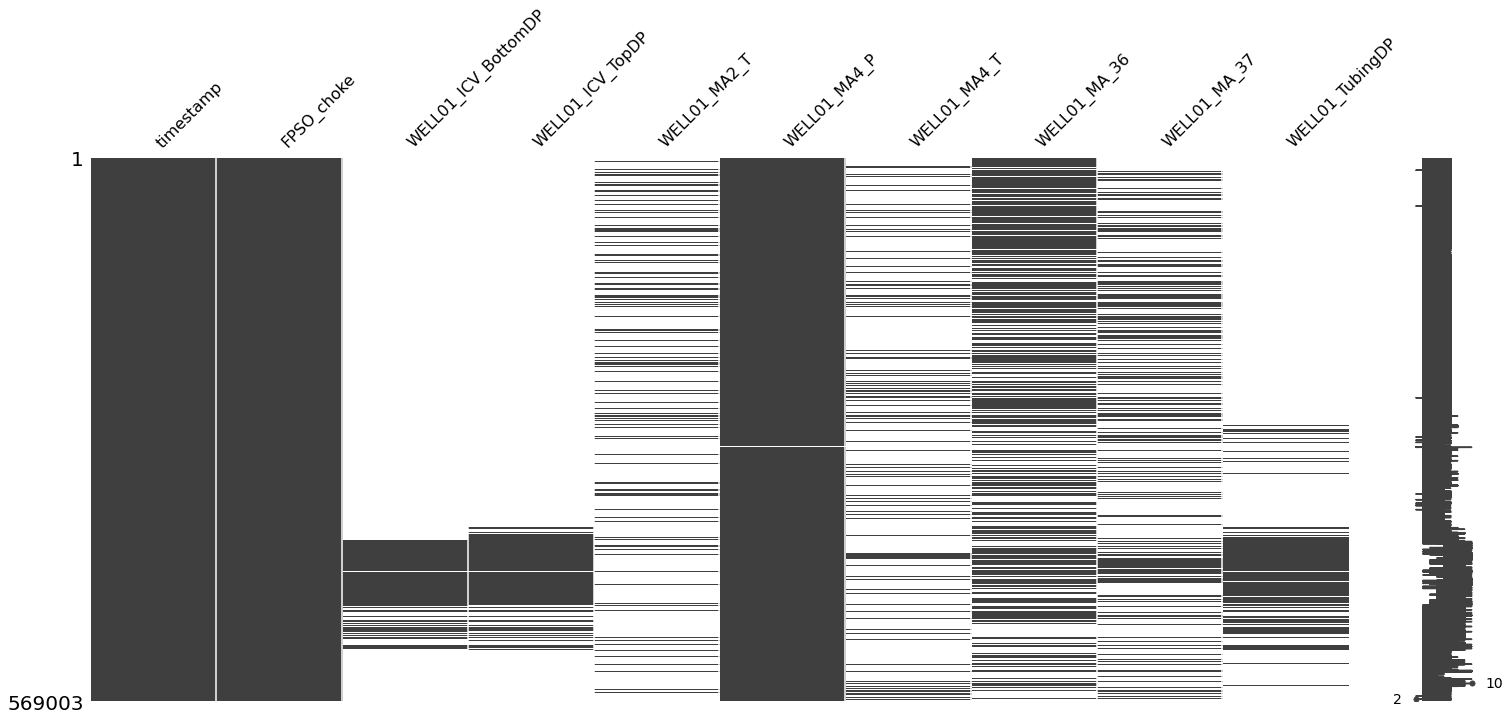

In [7]:
msno.matrix(df);

### Cleaning strings in df to convert variables format

In [8]:
df[df['FPSO_choke'] == 'Bad']

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
826,2018-01-05 08:38:00.000000,Bad,NaN,NaN,NaN,643.6683,NaN,NaN,259.3432,NaN
839,2018-01-05 14:26:32.000000,Bad,NaN,NaN,Bad,Bad,Bad,Bad,Bad,NaN
5069,2018-01-10 10:06:00.000000,Bad,NaN,NaN,87.60981,611.2408,87.75541,Bad,Bad,NaN
9671,2018-01-13 14:42:06.000000,Bad,NaN,NaN,87.52182,619.6401,Bad,Bad,Bad,NaN
9672,2018-01-13 14:43:30.000000,Bad,NaN,NaN,Bad,Bad,Bad,Bad,Bad,NaN
...,...,...,...,...,...,...,...,...,...,...
96,2019-04-28 08:00:00.105011,Bad,NaN,NaN,NaN,Bad,NaN,Bad,Bad,NaN
7104,2019-05-12 16:47:30.137008,Bad,NaN,NaN,NaN,Bad,NaN,Bad,Bad,NaN
7106,2019-05-12 17:15:30.217010,Bad,NaN,NaN,Bad,Bad,Bad,Bad,Bad,NaN
7119,2019-05-15 15:54:30.043014,Bad,NaN,NaN,Bad,Bad,Bad,Bad,Bad,NaN


In [9]:
df = df.replace('Bad', np.nan)
df = df.replace('Out of Serv', np.nan)
df = df.replace('Comm Fail', np.nan)
df = df.replace('Pt Created', np.nan)
df = df.replace('I/O Timeout', np.nan)
df = df.replace('Configure', np.nan)

In [10]:
for col in df.columns:
    if col == 'timestamp':
        df[col] = df[col].astype('datetime64[ns]')
    else:
        df[col] = df[col].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569003 entries, 0 to 23459
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            569003 non-null  datetime64[ns]
 1   FPSO_choke           568335 non-null  float64       
 2   WELL01_ICV_BottomDP  91560 non-null   float64       
 3   WELL01_ICV_TopDP     100267 non-null  float64       
 4   WELL01_MA2_T         104716 non-null  float64       
 5   WELL01_MA4_P         565897 non-null  float64       
 6   WELL01_MA4_T         97142 non-null   float64       
 7   WELL01_MA_36         327327 non-null  float64       
 8   WELL01_MA_37         197936 non-null  float64       
 9   WELL01_TubingDP      113493 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 47.8 MB


In [11]:
df.head()

,timestamp,FPSO_choke,WELL01_ICV_BottomDP,WELL01_ICV_TopDP,WELL01_MA2_T,WELL01_MA4_P,WELL01_MA4_T,WELL01_MA_36,WELL01_MA_37,WELL01_TubingDP
0,2018-01-01 00:01:30,0.000000,NaN,NaN,86.09845,643.5891,86.11267,NaN,NaN,NaN
1,2018-01-01 00:02:00,0.000000,NaN,NaN,NaN,643.5891,NaN,NaN,NaN,NaN
2,2018-01-01 01:51:00,0.000000,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
3,2018-01-01 01:51:30,0.262501,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN
4,2018-01-01 01:52:30,0.262501,NaN,NaN,NaN,643.5936,NaN,NaN,NaN,NaN


In [12]:
joblib.dump(df, '../inputs/pre-processed/all_data_clean.pkl')

['../inputs/pre-processed/all_data_clean.pkl']

In [ ]:
df['timestamp'] = df['timestamp'].apply(lambda row: row.round(freq='d'))

In [ ]:
df

In [ ]:
# Taking daily mean and std
daily_stats = df.groupby(by='timestamp').agg([np.mean, np.std])

daily_stats

In [ ]:
# Swapping levels of columns index
daily_stats.columns = daily_stats.columns.swaplevel()
daily_stats

In [ ]:
daily_stats.info()

### ICVs action history

In [ ]:
icv_action_hist = joblib.load('../inputs/pre-processed/icv_action_hist.pkl')
icv_action_hist

In [ ]:
icv_action_hist.info()

In [ ]:
icv_action_hist.rename(columns={'Data': 'timestamp'}, inplace=True)

icv_action_hist

In [ ]:
icv_action_hist['timestamp'] = icv_action_hist['timestamp'].astype('datetime64[ns]')
icv_action_hist.set_index('timestamp', inplace=True)
icv_action_hist.head()

### Combining process data and ICV action data

In [ ]:
df_action = pd.merge_asof(daily_stats, icv_action_hist, on='timestamp',\
                   tolerance=pd.Timedelta('1d'), direction='nearest')

In [ ]:
df_action.info()

In [ ]:
df_action.head()

In [ ]:
df_action.tail()

In [ ]:
msno.matrix(df_action);

In [ ]:
joblib.dump(df_action, '../inputs/pre-processed/df_action.pkl')
joblib.dump(daily_stats, '../inputs/pre-processed/daily_stats.pkl')